<a href="https://colab.research.google.com/github/ksahitreddy/Traffic-Data-Analysis-and-Forecasting/blob/main/Traffic%20Analysis/Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats

In [ ]:
df = pd.read_csv('traffic.csv')


In [ ]:
print(df.head())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [ ]:
print(df.tail())

                  DateTime  Junction  Vehicles           ID
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234


In [ ]:
print(df['Vehicles'].describe())

count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

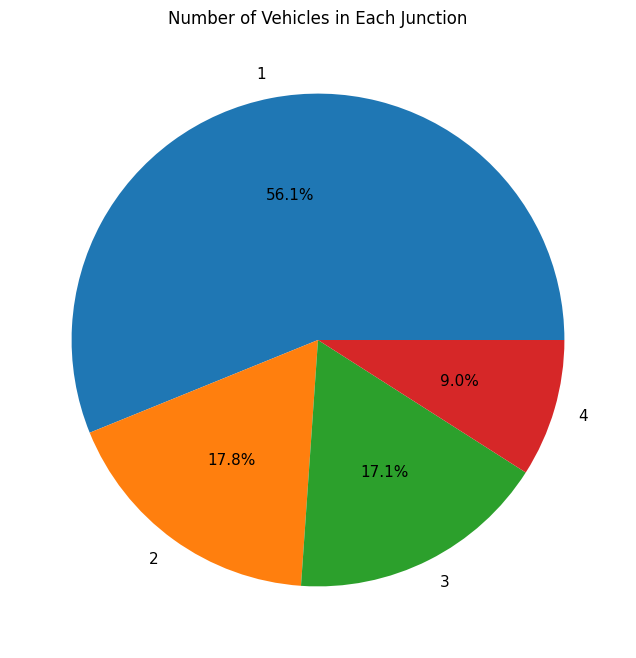

In [ ]:
junction_vehicles_count = df.groupby('Junction')['Vehicles'].mean()
plt.figure(figsize=(8, 8))
plt.pie(junction_vehicles_count, labels=junction_vehicles_count.index, autopct='%1.1f%%',textprops={'fontsize': 11})
plt.title('Number of Vehicles in Each Junction')
 # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [ ]:
# Hourly aggregation
df_hourly = df.resample('H').mean()

# Daily aggregation
df_daily = df.resample('D').mean()

# Weekly aggregation
df_weekly = df.resample('W').mean()


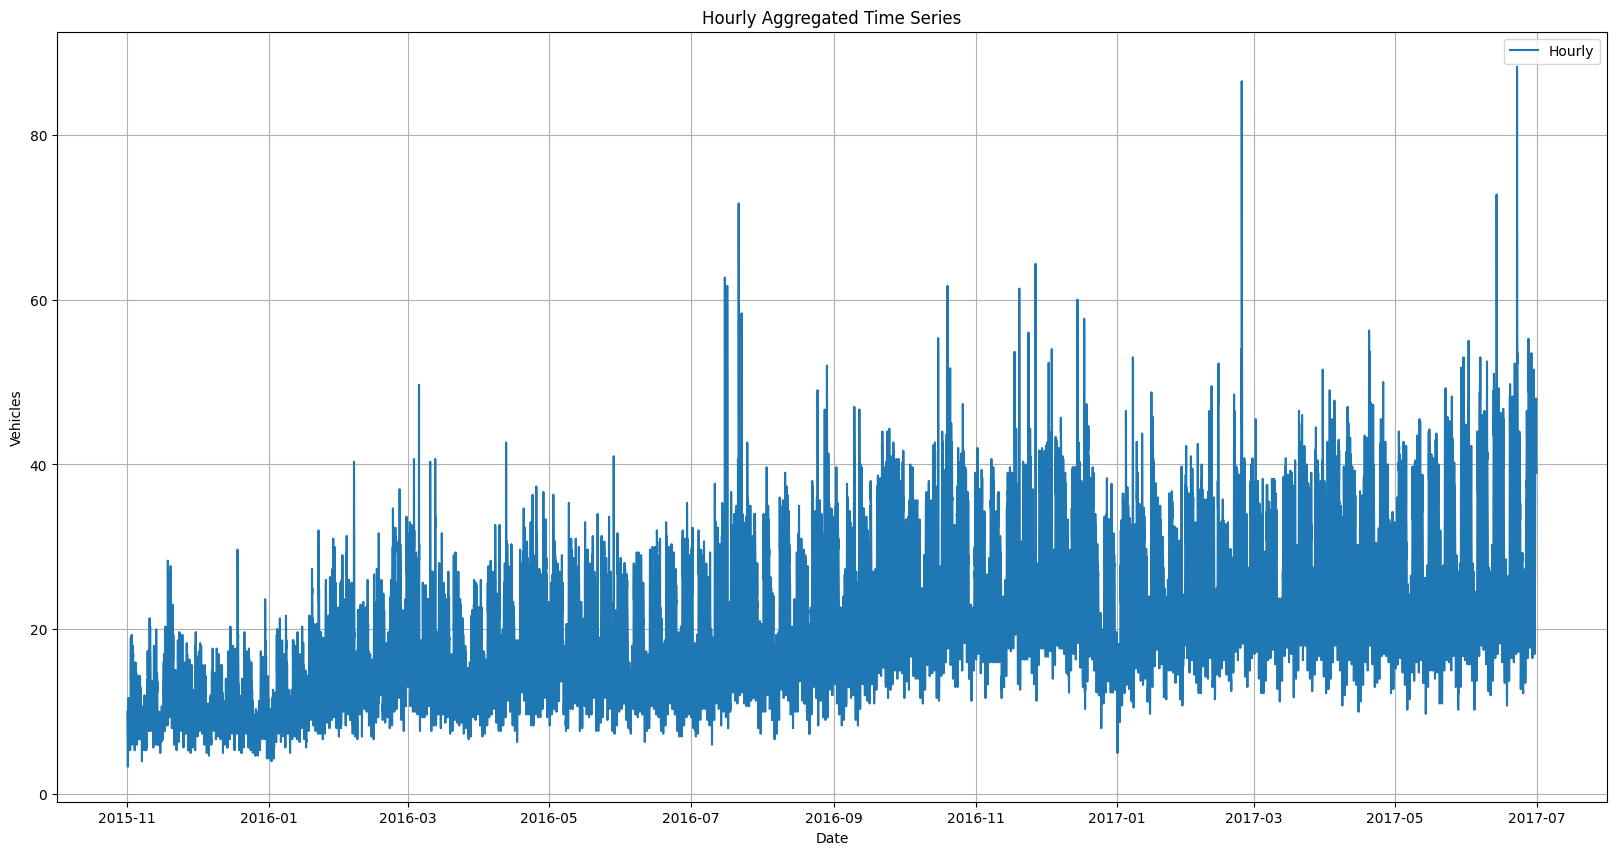

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_hourly.index, df_hourly['Vehicles'], label='Hourly')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Hourly Aggregated Time Series')
plt.legend()
plt.grid(True)
plt.show()

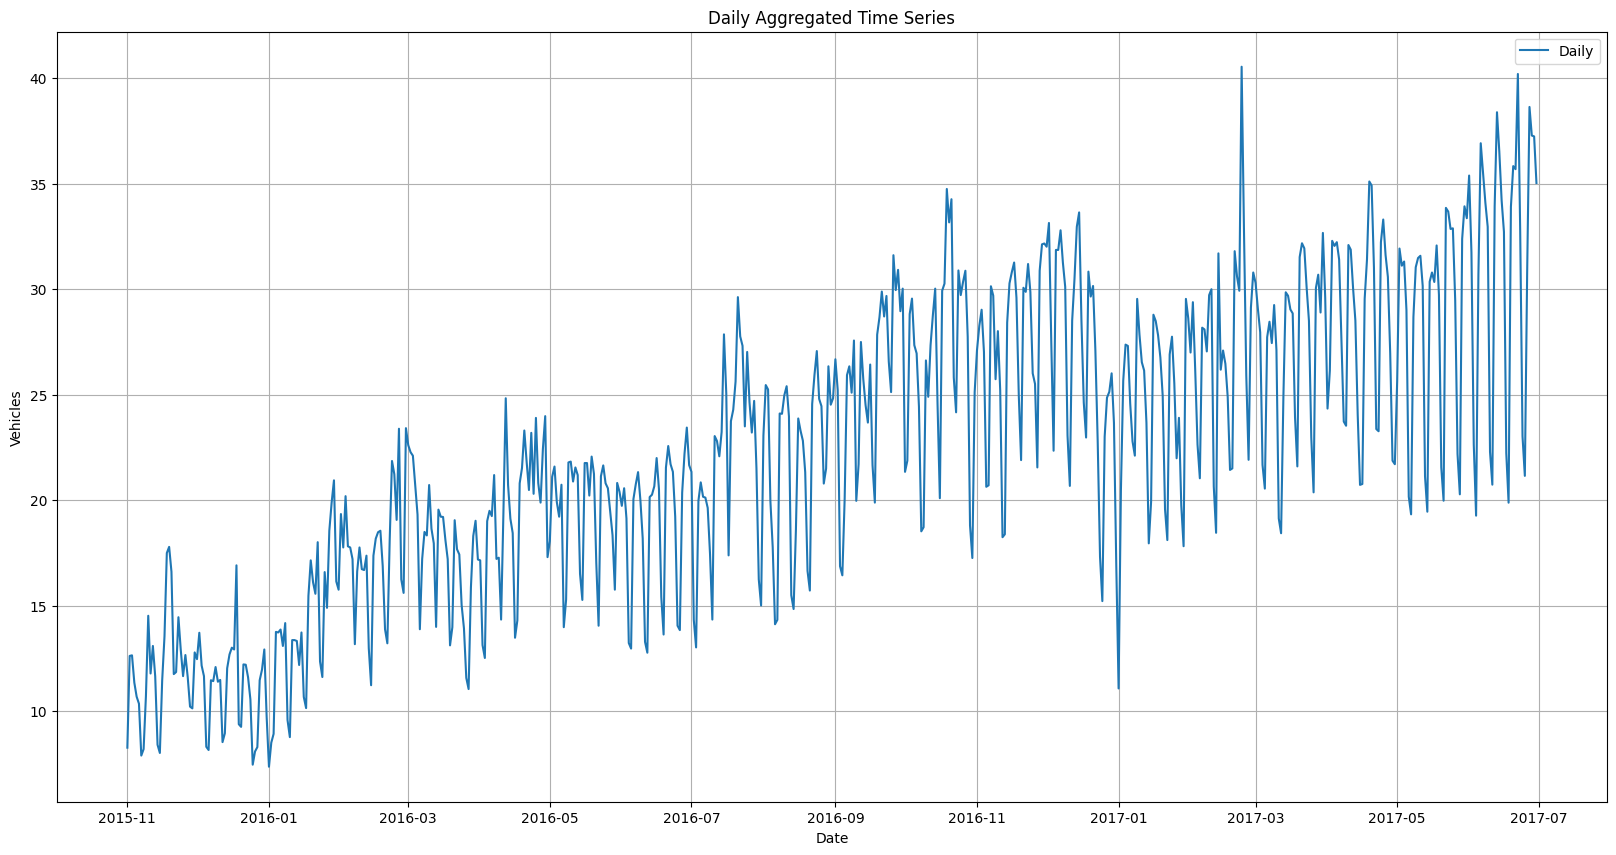

In [ ]:


# Plot the daily aggregated data
plt.figure(figsize=(20, 10))
plt.plot(df_daily.index, df_daily['Vehicles'], label='Daily')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Daily Aggregated Time Series')
plt.legend()
plt.grid(True)
plt.show()


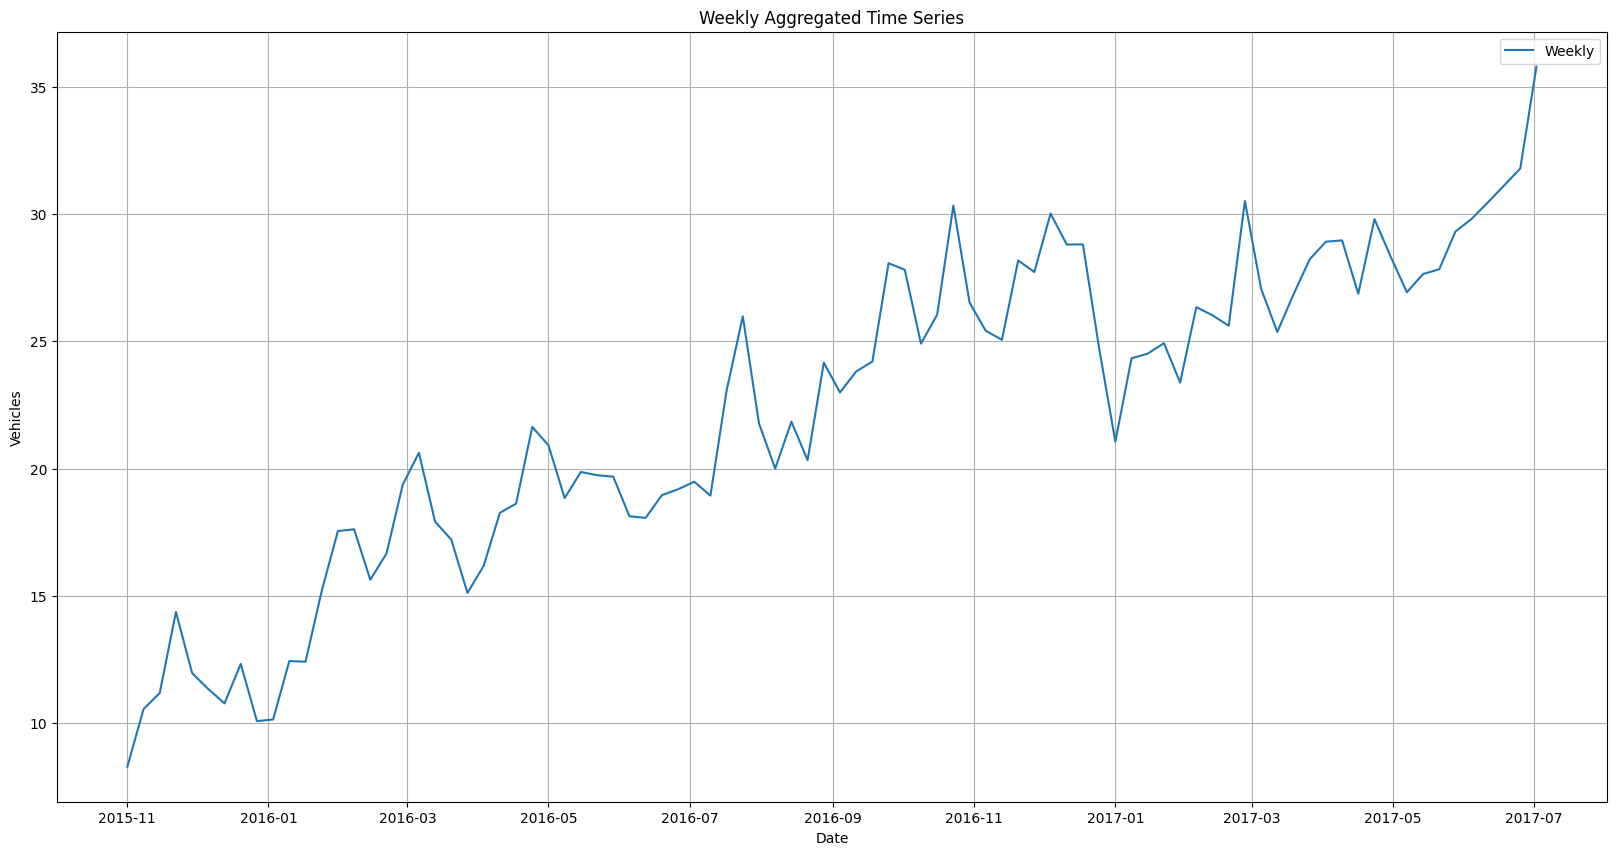

In [ ]:
# Plot the weekly aggregated data
plt.figure(figsize=(20, 10))
plt.plot(df_weekly.index, df_weekly['Vehicles'], label='Weekly')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Weekly Aggregated Time Series')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np

# Calculate z-scores for each data point
z_scores = np.abs((df['Vehicles'] - df['Vehicles'].mean()) / df['Vehicles'].std())

# Define a threshold for outliers
threshold = 2.5
# Identify otliers based on the threshold
outliers = df[z_scores > threshold]
print(outliers)

                     Junction  Vehicles           ID
DateTime                                            
2016-06-29 11:00:00         1        76  20160629111
2016-07-11 11:00:00         1        79  20160711111
2016-07-21 11:00:00         1        86  20160721111
2016-07-25 11:00:00         1        77  20160725111
2016-08-22 11:00:00         1        78  20160822111
...                       ...       ...          ...
2017-04-02 18:00:00         3        96  20170402183
2017-04-20 00:00:00         3        77  20170420003
2017-06-13 18:00:00         3       112  20170613183
2017-06-22 14:00:00         3       162  20170622143
2017-06-22 15:00:00         3        83  20170622153

[1920 rows x 3 columns]


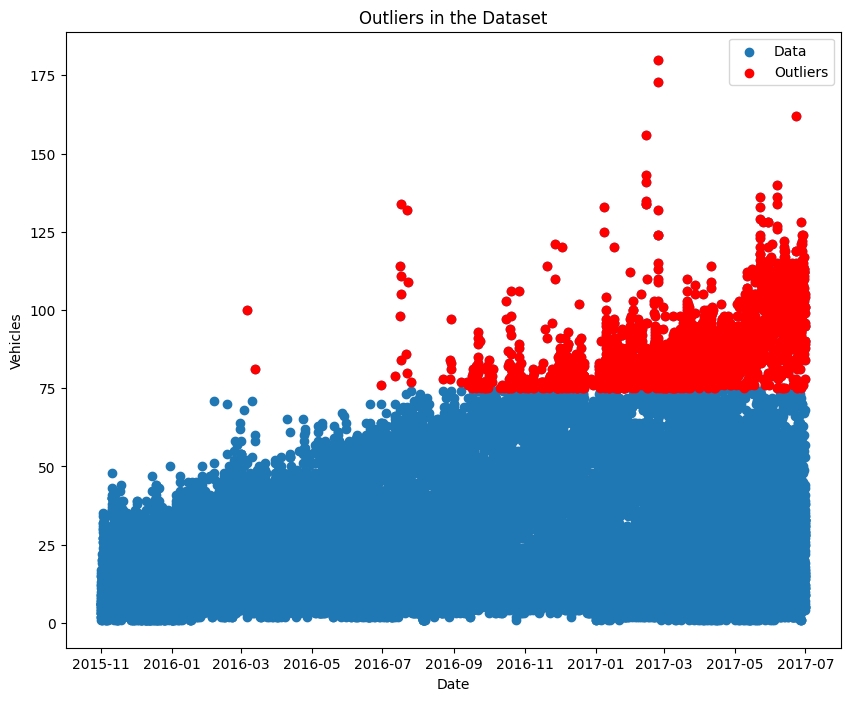

In [ ]:


# Plot the entire dataset
plt.figure(figsize=(10, 8))
plt.scatter(df.index, df['Vehicles'], label='Data')

# Identify and plot outliers
outliers = df[z_scores > threshold]
plt.scatter(outliers.index, outliers['Vehicles'], color='red', label='Outliers')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.title('Outliers in the Dataset')
plt.legend()

# Show the plot
plt.show()


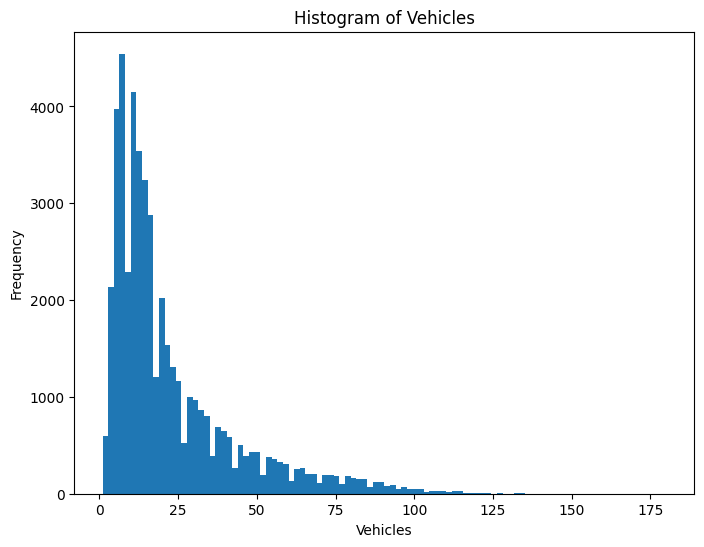

In [ ]:

plt.figure(figsize=(8,6))
# Plotting histogram
plt.hist(df['Vehicles'], bins=100)
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicles')
plt.show()

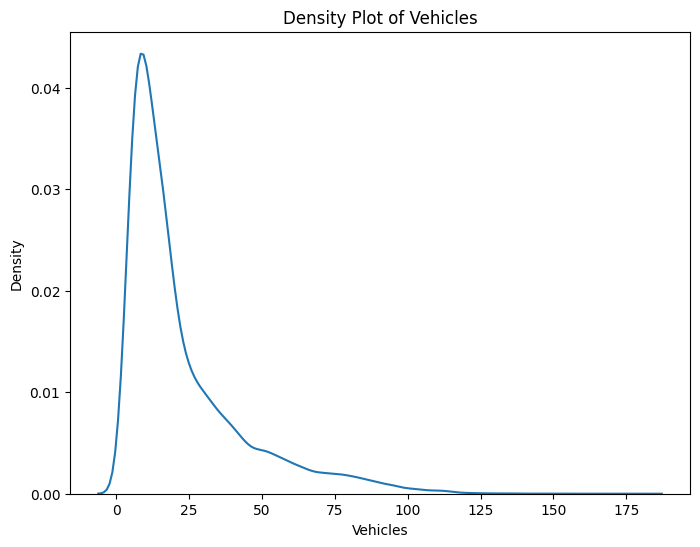

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
# Plotting density plot
sns.kdeplot(df['Vehicles'])
plt.xlabel('Vehicles')
plt.ylabel('Density')
plt.title('Density Plot of Vehicles')
plt.show()

In [ ]:
# Calculate summary statistics
mean = df['Vehicles'].mean()
median = df['Vehicles'].median()
std_dev = df['Vehicles'].std()
variance = df['Vehicles'].var()
skewness = df['Vehicles'].skew()
kurtosis = df['Vehicles'].kurtosis()

print('Mean:', mean)
print('Median:', median)
print('Standard Deviation:', std_dev)
print('Variance:', variance)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

Mean: 22.79133416458853
Median: 15.0
Standard Deviation: 20.75006252003181
Variance: 430.56509458522896
Skewness: 1.8196552943529192
Kurtosis: 3.391794623501753


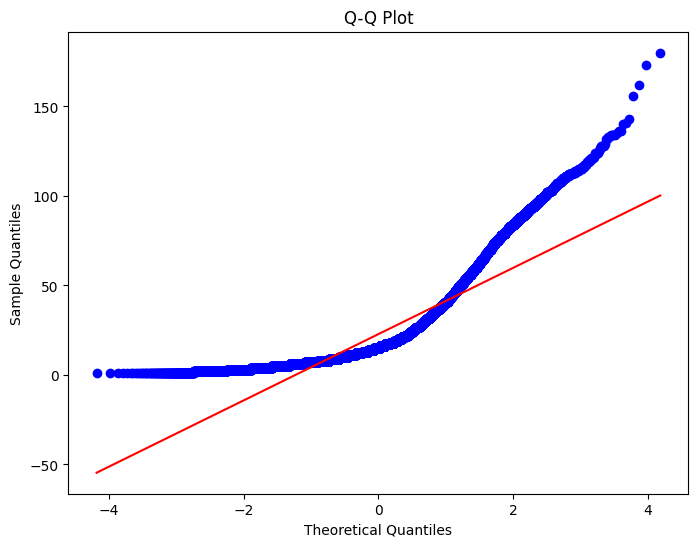

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Create Q-Q plot
stats.probplot(df['Vehicles'], dist='norm', plot=plt)

plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

<Figure size 1000x600 with 0 Axes>

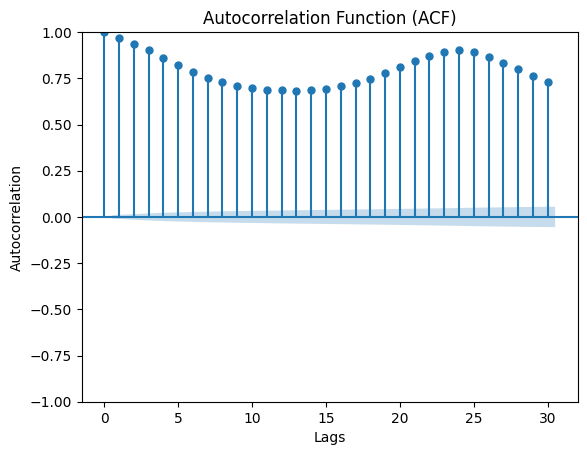

<Figure size 1000x600 with 0 Axes>

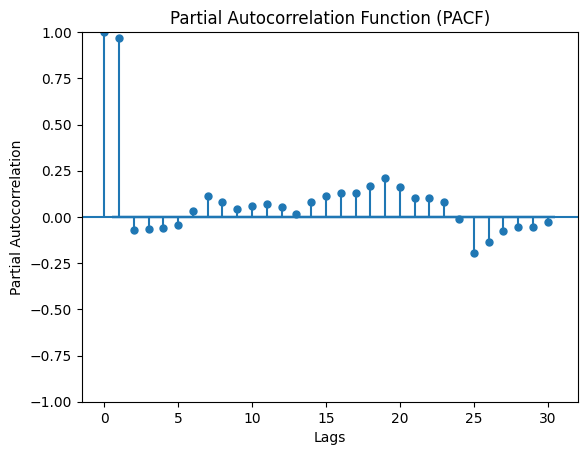

In [ ]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(df['Vehicles'], lags=30, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(df['Vehicles'], lags=30, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
